In [1]:
import re 
import pandas as pd

In [2]:
f=open("Whatsapp Chat with SPIT 2025 Batch.txt","r",encoding="utf-8")

In [3]:
data=f.read()

In [4]:
print(data)

30/12/21, 1:03 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
30/12/21, 12:02 pm - Vedant Spit created group "NEW SPIT Freshers"
30/12/21, 1:03 pm - You joined using this group's invite link
30/12/21, 1:03 pm - Faiz Spit joined using this group's invite link
30/12/21, 1:03 pm - Adwait Comps B joined using this group's invite link
30/12/21, 1:03 pm - Aarya Patil joined using this group's invite link
30/12/21, 1:03 pm - Aarya Patil: Security level ultra pro max🔥😂
30/12/21, 1:04 pm - Faiz Spit: Can somebody send the link to the AI/ML branch group
30/12/21, 1:04 pm - +91 98331 62915 joined using this group's invite link
30/12/21, 1:05 pm - +91 98704 67397 joined using this group's invite link
30/12/21, 1:06 pm - +91 73038 21905 joined using this group's invite link
30/12/21, 1:06 pm - +91 73044 43713 joined using this group's invite link
30/12/21, 1:07 pm - +91 96194 80353 joined using this gr

In [5]:
def preprocess(data):
    pattern = '\d{2}\/\d{2}\/\d{2},\s\d{1,2}:\d{2}\s\w{2}\s-\s'
    messages = re.split(pattern, data)[1:]
    # messages
    dates = re.findall(pattern, data)
    # dates
    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    df['message_date'] = df['message_date'].str.split('-').str.get(0).str.strip()
    # convert message_date type
    def repl(x):
        if 'pm' in x:
            pattern = ',\s(\d{1,2})'
            hr = re.findall(pattern, x)
            if int(hr[0]) < 12:
                y = re.sub(',\s(?:\d{1,2})', ", " + str(int(hr[0]) + 12), x)
                return y
            else:
                return x
        else:
            pattern = ',\s(\d{1,2})'
            hr = re.findall(pattern, x)
            if int(hr[0]) == 12:
                y = re.sub(',\s(?:\d{1,2})', ", " + str(int(hr[0]) - 12), x)
                return y
            else:
                return x

    df['message_date'] = df['message_date'].apply(repl)
    df['message_date'] = df['message_date'].str.replace('pm', '').str.strip()
    df['message_date'] = df['message_date'].str.replace('am', '').str.strip()

    # # convert message_date type
    df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M')
    df.rename(columns={'message_date': 'date'}, inplace=True)

    # separate users and messages
    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('(\+\d{2}\s\d{5}\s\d{5})|(\w+):', message)
        try:
            entry.remove(None)
        except:
            pass
        if entry[1:]:
            users.append(entry[1])
            messages.append(entry[2])
        else:
            users.append('group-notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'], inplace=True)

    df['year'] = df['date'].dt.year
    df['month_name'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute
    df['month_num'] = df['date'].dt.month
    df['only_date'] = df['date'].dt.date
    df['day_name'] = df['date'].dt.day_name()
    df['message'] = df['message'].str.replace(':', '').str.strip()
    return df

In [6]:
df=preprocess(data)

In [7]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [8]:
user_list = df['user'].unique().tolist()
user_list.remove('group-notification')
user_list.sort()
user_list.insert(0,'Overall')
user_list

['Overall',
 '+91 70002 55258',
 '+91 70060 61747',
 '+91 70214 11053',
 '+91 70217 17658',
 '+91 70218 36572',
 '+91 70300 78022',
 '+91 70391 23015',
 '+91 70451 92546',
 '+91 70455 86451',
 '+91 70456 93558',
 '+91 70457 42545',
 '+91 70583 26377',
 '+91 70837 66168',
 '+91 72492 21301',
 '+91 73038 21905',
 '+91 73041 56026',
 '+91 73044 43713',
 '+91 73048 01595',
 '+91 73851 01792',
 '+91 73870 05074',
 '+91 74000 24911',
 '+91 74003 54926',
 '+91 74478 61684',
 '+91 74982 20603',
 '+91 74986 96490',
 '+91 74988 02487',
 '+91 74993 51437',
 '+91 75069 61794',
 '+91 76208 90430',
 '+91 76660 17972',
 '+91 76668 37443',
 '+91 76668 55716',
 '+91 77092 78323',
 '+91 77108 06950',
 '+91 77159 16381',
 '+91 77159 90663',
 '+91 77189 92927',
 '+91 77209 98676',
 '+91 77382 28239',
 '+91 77383 53845',
 '+91 77386 78587',
 '+91 77559 33776',
 '+91 77579 58879',
 '+91 78208 08113',
 '+91 79774 26289',
 '+91 79777 11852',
 '+91 80777 21391',
 '+91 80803 06050',
 '+91 80809 79528',
 '+91 80

In [9]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [10]:
x=df["user"].value_counts().head()

In [11]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

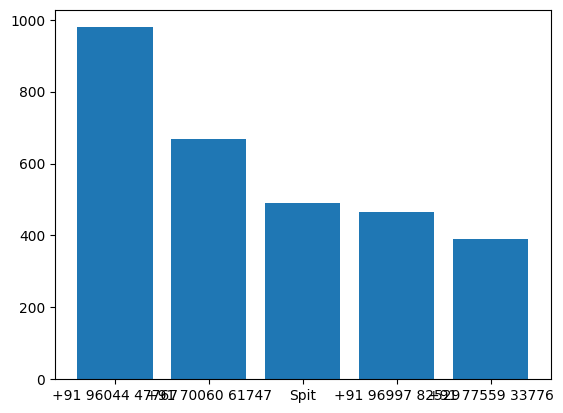

In [12]:
name=x.index
count=x.values
plt.bar(name,count)

In [13]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [14]:
temp=df[df["user"]!="group-notification"]
temp=temp[temp["message"]!="<Media omitted>"]

In [15]:
f=open("stop_hinglish.txt","r")
stop_words=f.read()
#print(stop_words)

In [16]:
words=[]
for message in temp["message"]:
    for word in message.lower().split():
        if word not in stop_words:
            words.extend(message.split())

In [17]:
words

['Security',
 'level',
 'ultra',
 'pro',
 'max🔥😂',
 'Security',
 'level',
 'ultra',
 'pro',
 'max🔥😂',
 'Security',
 'level',
 'ultra',
 'pro',
 'max🔥😂',
 'Security',
 'level',
 'ultra',
 'pro',
 'max🔥😂',
 'Can',
 'somebody',
 'send',
 'the',
 'link',
 'to',
 'the',
 'AI/ML',
 'branch',
 'group',
 'Can',
 'somebody',
 'send',
 'the',
 'link',
 'to',
 'the',
 'AI/ML',
 'branch',
 'group',
 'Can',
 'somebody',
 'send',
 'the',
 'link',
 'to',
 'the',
 'AI/ML',
 'branch',
 'group',
 'Can',
 'somebody',
 'send',
 'the',
 'link',
 'to',
 'the',
 'AI/ML',
 'branch',
 'group',
 'Can',
 'somebody',
 'send',
 'the',
 'link',
 'to',
 'the',
 'AI/ML',
 'branch',
 'group',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'joined',
 'using',


In [18]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,the,47772
1,to,44321
2,and,34742
3,of,31721
4,you,20701
5,a,20085
6,for,19093
7,in,16935
8,your,15209
9,is,14975


In [19]:
!pip install emoji

In [20]:
emojis=[]
for message in df["message"]:
    emojis.extend([c for c in message if c in ['en']])

In [21]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

""


In [22]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [23]:
timeline=df.groupby(["year","month_num","month_name"]).count()["message"].reset_index()

In [24]:
timeline

,year,month_num,month_name,message
0,2021,12,December,797
1,2022,1,January,5548
2,2022,2,February,553
3,2022,3,March,104
4,2022,4,April,1069
5,2022,5,May,18
6,2022,6,June,110
7,2022,7,July,8
8,2022,8,August,25
9,2022,9,September,24


In [25]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline["month_name"][i]+ "-" + str(timeline["year"][i]))

In [26]:
time

['December-2021',
 'January-2022',
 'February-2022',
 'March-2022',
 'April-2022',
 'May-2022',
 'June-2022',
 'July-2022',
 'August-2022',
 'September-2022',
 'October-2022',
 'November-2022',
 'December-2022',
 'January-2023',
 'February-2023',
 'March-2023',
 'April-2023']

In [27]:
timeline["time"]=time
timeline

,year,month_num,month_name,message,time
0,2021,12,December,797,December-2021
1,2022,1,January,5548,January-2022
2,2022,2,February,553,February-2022
3,2022,3,March,104,March-2022
4,2022,4,April,1069,April-2022
5,2022,5,May,18,May-2022
6,2022,6,June,110,June-2022
7,2022,7,July,8,July-2022
8,2022,8,August,25,August-2022
9,2022,9,September,24,September-2022


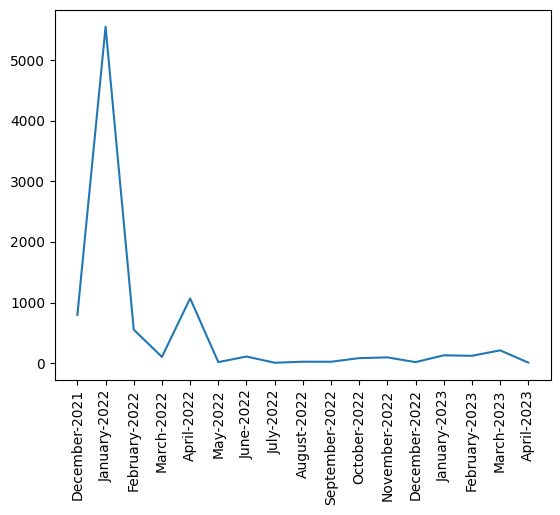

In [28]:
plt.plot(timeline["time"],timeline["message"])
plt.xticks(rotation="vertical")
plt.show()

In [29]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [30]:
df["day_name"].value_counts()

Monday       3253
Thursday     1375
Saturday     1129
Friday        917
Tuesday       890
Wednesday     717
Sunday        647
Name: day_name, dtype: int64

In [31]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [32]:
f1=open("demo.txt","r",encoding="utf-8")

In [33]:
d=f1.read()

In [34]:
print(d)

4/5/22, 11:26 PM - Suvarna: <Media omitted>
4/13/22, 9:53 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
4/22/22, 10:51 AM - +91 84338 29526: <Media omitted>
4/22/22, 4:54 PM - +91 84338 29526: <Media omitted>
7/1/22, 6:40 PM - +91 99875 36882: <Media omitted>
7/1/22, 6:44 PM - +91 98920 44361: <Media omitted>
7/25/22, 4:36 PM - 😊: <Media omitted>
8/24/22, 1:26 PM - +91 99875 36882: <Media omitted>
12/28/22, 3:41 PM - 😊: <Media omitted>
2/28/23, 2:44 PM - Yayel: <Media omitted>
3/5/23, 11:08 AM - +91 73500 25591: <Media omitted>
3/24/23, 10:15 PM - +91 73500 25591: <Media omitted>
3/25/23, 8:47 AM - Tushar Zhope: *Opportunities are never lost,*

*they are always taken by the people who are ready!*

           *🌹🌹Good Morning 🌹🌹*
3/25/23, 10:47 AM - +91 73500 25591: <Media omitted>
3/25/23, 5:11 PM - Yayel: <Media omitted>
3/26/23, 8:07 AM - Tushar Zhope: *“Your talent determines what you c

In [35]:
def preprocess1(data):
    pattern = '\d{2}\/\d{2}\/\d{2},\s\d{1,2}:\d{2}\s\w{2}\s-\s'
    messages = re.split(pattern, data)[1:]
    # messages
    dates = re.findall(pattern, data)
    # dates
    df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    df['message_date'] = df['message_date'].str.split('-').str.get(0).str.strip()
    # convert message_date type
    def repl(x):
        if 'pm' or "PM" in x:
            pattern = ',\s(\d{1,2})'
            hr = re.findall(pattern, x)
            if int(hr[0]) < 12:
                y = re.sub(',\s(?:\d{1,2})', ", " + str(int(hr[0]) + 12), x)
                return y
            else:
                return x
        else:
            pattern = ',\s(\d{1,2})'
            hr = re.findall(pattern, x)
            if int(hr[0]) == 12:
                y = re.sub(',\s(?:\d{1,2})', ", " + str(int(hr[0]) - 12), x)
                return y
            else:
                return x

    df['message_date'] = df['message_date'].apply(repl)
    df['message_date'] = df['message_date'].str.replace('pm', '').str.strip()
    df['message_date'] = df['message_date'].str.replace('am', '').str.strip()
    df['message_date'] = df['message_date'].str.replace('PM', '').str.strip()
    df['message_date'] = df['message_date'].str.replace('AM', '').str.strip()
    

    # # convert message_date type
    df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M')
    df.rename(columns={'message_date': 'date'}, inplace=True)

    # separate users and messages
    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('(\+\d{2}\s\d{5}\s\d{5})|(\w+):', message)
        try:
            entry.remove(None)
        except:
            pass
        if entry[1:]:
            users.append(entry[1])
            messages.append(entry[2])
        else:
            users.append('group-notification')
            messages.append(entry[0])

    df['user'] = users
    df['message'] = messages
    df.drop(columns=['user_message'], inplace=True)

    df['year'] = df['date'].dt.year
    df['month_name'] = df['date'].dt.month_name()
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute
    df['month_num'] = df['date'].dt.month
    df['only_date'] = df['date'].dt.date
    df['day_name'] = df['date'].dt.day_name()
    df['message'] = df['message'].str.replace(':', '').str.strip()
    return df

In [36]:
dataframe=preprocess1(d)


In [37]:
dataframe

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2022-12-28 15:41:00,2,44 PM -,2022,December,28,15,41,12,2022-12-28,Wednesday


In [38]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [39]:
def keyword_find(keyword,df):
    df1=df[df.message.str.contains( keyword )]
    return df1
keyword_find("Pratham",df)

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
6656,2022-02-15 22:11:00,+91 70060 61747,Pratham full confident ha ayo koi mere samne m...,2022,February,15,22,11,2,2022-02-15,Tuesday
8203,2022-07-08 13:17:00,+91 98207 15897,"Hi Guys, \nI'm Prathamesh Bhoi from BE IT.\nSi...",2022,July,8,13,17,7,2022-07-08,Friday
8257,2022-10-05 19:18:00,+91 98208 56016,💫💫 *Greetings From E-ESA!!*💫💫\n\nWe are please...,2022,October,5,19,18,10,2022-10-05,Wednesday


In [40]:
df.message.str.contains( "Pratham" )

0       False
1       False
2       False
3       False
4       False
        ...  
8923    False
8924    False
8925    False
8926    False
8927    False
Name: message, Length: 8928, dtype: bool

In [41]:
df.head()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name
0,2021-12-30 13:03:00,group-notification,Messages and calls are end-to-end encrypted. N...,2021,December,30,13,3,12,2021-12-30,Thursday
1,2021-12-30 12:02:00,group-notification,"Vedant Spit created group ""NEW SPIT Freshers""",2021,December,30,12,2,12,2021-12-30,Thursday
2,2021-12-30 13:03:00,group-notification,You joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
3,2021-12-30 13:03:00,group-notification,Faiz Spit joined using this group's invite link,2021,December,30,13,3,12,2021-12-30,Thursday
4,2021-12-30 13:03:00,group-notification,Adwait Comps B joined using this group's invit...,2021,December,30,13,3,12,2021-12-30,Thursday


In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [46]:
df["positive"]=[sia.polarity_scores(i)["pos"] for i in df["message"]]
df["negative"]=[sia.polarity_scores(i)["neg"] for i in df["message"]]
df["neutral"]=[sia.polarity_scores(i)["neu"] for i in df["message"]]
df.tail()

,date,user,message,year,month_name,day,hour,minute,month_num,only_date,day_name,positive,negative,neutral
8923,2023-04-02 13:17:00,+91 91377 47811,<Media omitted>,2023,April,2,13,17,4,2023-04-02,Sunday,0.000,0.0,1.000
8924,2023-04-02 13:17:00,+91 91377 47811,Are you well aware of the Business World ?👨‍💼W...,2023,April,2,13,17,4,2023-04-02,Sunday,0.103,0.0,0.897
8925,2023-04-02 20:09:00,+91 96199 90529,,2023,April,2,20,9,4,2023-04-02,Sunday,0.000,0.0,0.000
8926,2023-04-02 22:58:00,+91 74003 54926,E-Cell S.P.I.T.✨is proud to announce that this...,2023,April,2,22,58,4,2023-04-02,Sunday,0.122,0.0,0.878
8927,2023-04-02 23:01:00,+91 74003 54926,,2023,April,2,23,1,4,2023-04-02,Sunday,0.000,0.0,0.000


In [47]:
x=sum(df["positive"])
y=sum(df["negative"])
z=sum(df["neutral"])


In [49]:
def sentiment_score(a,b,c):
    if a>b and b>c:
        print("Positive")
    elif b>a and b>c:
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x,y,z)

Neutral


In [52]:
a=df["positive"].sum()
b=df["negative"].sum()
c=df["neutral"].sum()

752.3599999999999

In [53]:
df["negative"].sum()

233.66100000000003

In [54]:
df["neutral"].sum()

7444.9800000000005

In [55]:
print(z)

7444.980000000003
